# Prelude
Hehe I really liked this activity. But I did the logistic regression a bit late and I am really out of energy now. So really sorry for doing only the required parts :c.

# Acknowledgements
I'd like to thank my instructors, Sir Rene Principe Jr. and Sir Kenneth Leo, for guiding me throughout the activity. I would also like to thank my professor, Ma'am Jing, for guiding me in my coding while my classmates and I worked in R202. I would also like to acknowledge my classmates: Abdel, Johnenn, Jonabel, Richmond, Lovely, Hans, Genesis, Jeruine, Rusher, and Ron for helping me complete this activity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



# Cellular Automaton

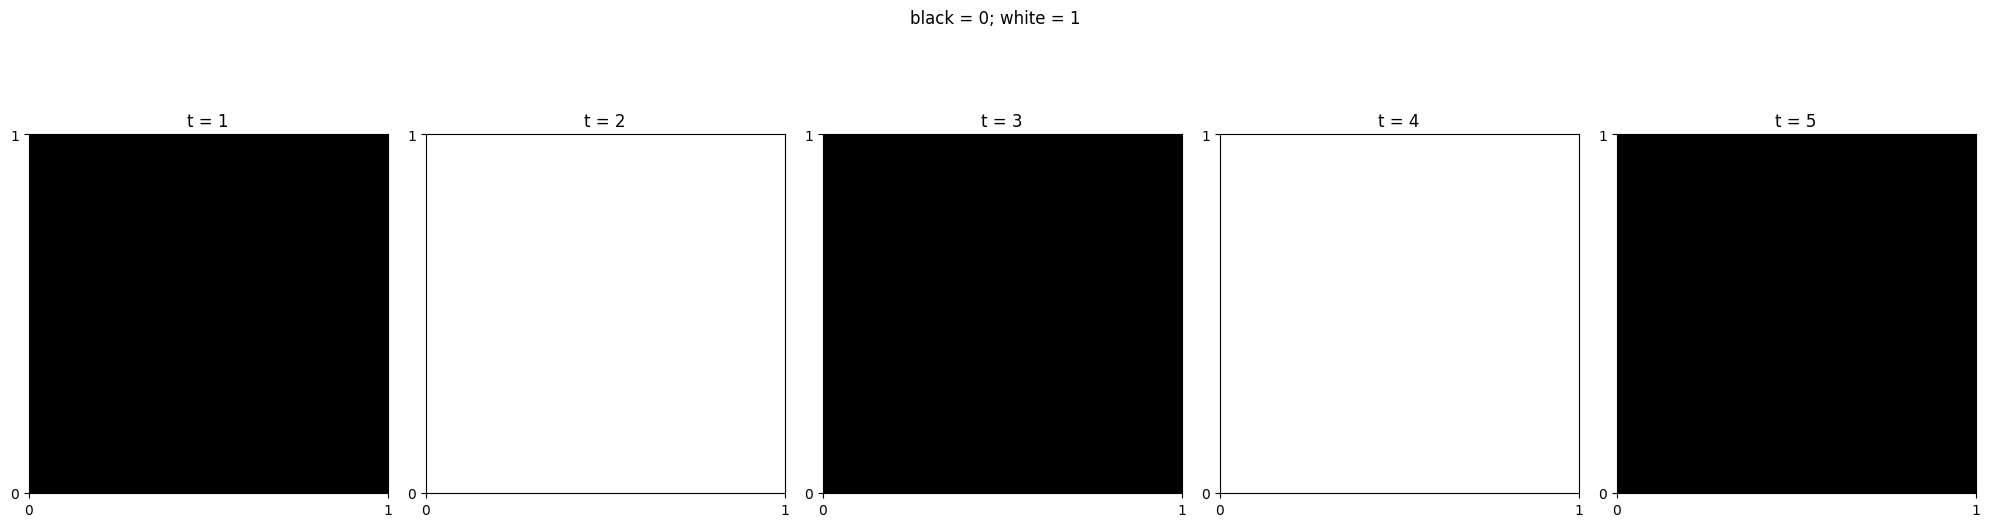

In [2]:
lattice = np.zeros([1,1])
frames = []
t_max = 5
fig, ax = plt.subplots(1, t_max, figsize = (t_max*4,6))
fig.suptitle('black = 0; white = 1')
for i in range(t_max):
    lattice[0,0] = (i)%2
    plot_lattice = lattice.copy()
    ax[i].imshow(plot_lattice, cmap = 'gray',extent=[0,1,0,1], vmin = 0, vmax = 1)
    ax[i].set_title('t = ' + str(i+1))
    ax[i].set_yticks([0,1])
    ax[i].set_xticks([0,1])
plt.tight_layout()
plt.show()

## Wolfram’s 1D CA models.

In [3]:
def first_generation(length):
    lattice = np.zeros([length])
    lattice[length//2] = 1
    return lattice

def generation(rule, lattice_height, lattice_length, plotting = True):
    first_gen = first_generation(lattice_length)
    all_gens = [first_gen]
    # Creating the lookup table for the rules
    rule_num = np.binary_repr(rule, 8)
    patterns = []
    i = 7
    while i >= 0:
        patterns.append(np.binary_repr(i, 3)) 
        i -= 1
    rules = {}
    for k in range(len(patterns)):
        rules.update({patterns[k] : int(rule_num[k])})
    
    prev_gen = first_gen
    # Generating the next row
    for i in range(lattice_height):
        current_gen = [0,0]
        for i in range(1, len(prev_gen)-1):
            key = str(int(prev_gen[i-1])) + str(int(prev_gen[i])) + str(int(prev_gen[i+1]))
            current_gen.insert(len(current_gen) - 1, rules[key])
        current_gen = np.array(current_gen)
        prev_gen = current_gen.copy()
        all_gens.append(current_gen)
        # plt.imshow(all_gens)
        # plt.show()

    all_gens = np.array(all_gens)
    
    if plotting == True:
        fig, ax = plt.subplots(figsize = (20,10))
        ax.imshow(all_gens, vmin = 0, vmax = 1, cmap = 'binary')
        ax.set_title('Rule: '+ str(rule) + '\ncols: '+str(lattice_length)+'; rows: ' + str(lattice_height)+'\nblack = 0; white = 1', loc = 'left')
        plt.show()

    return all_gens

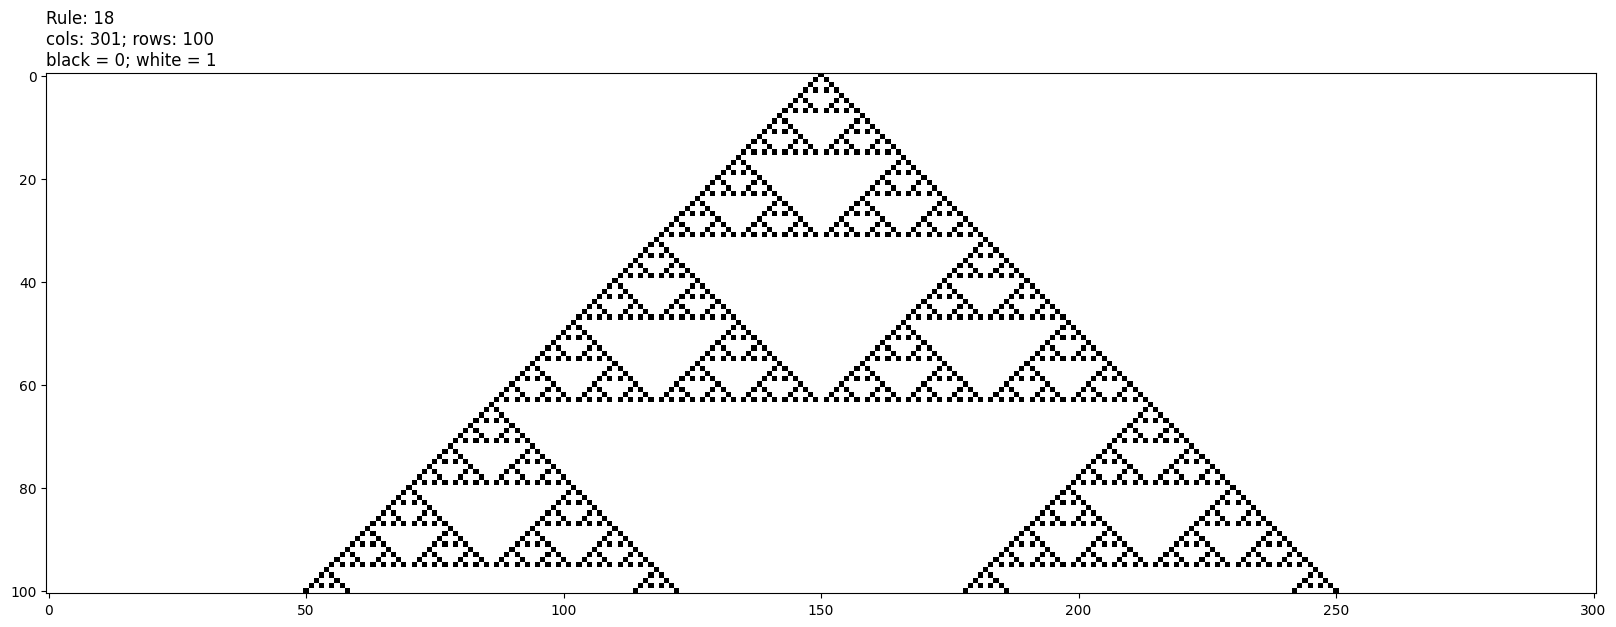

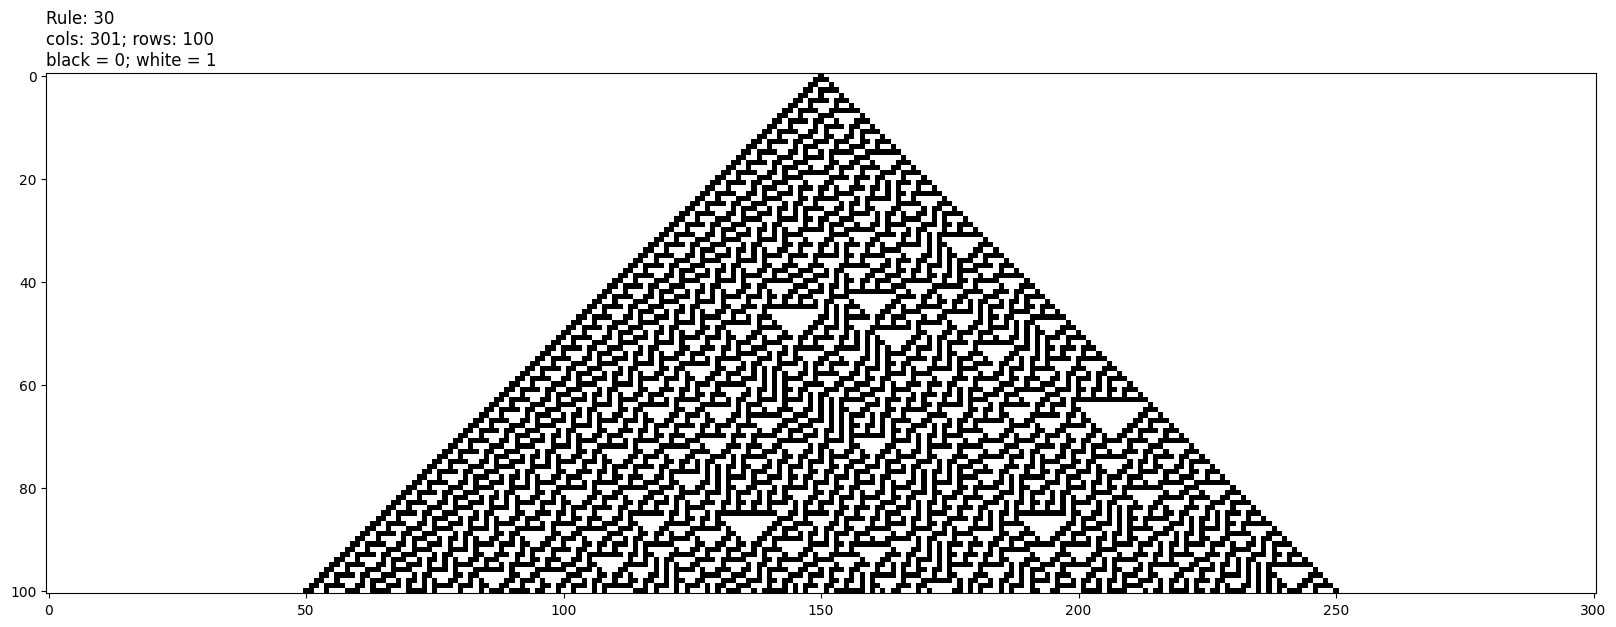

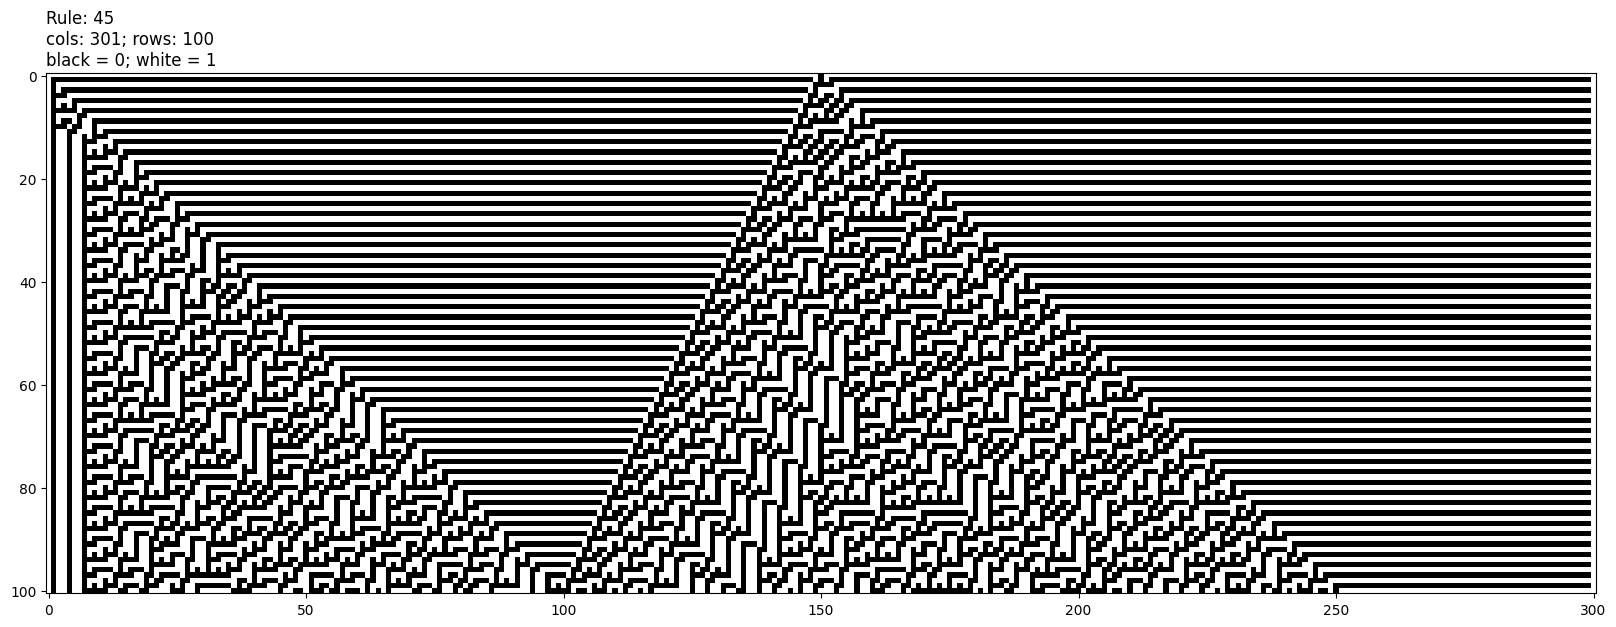

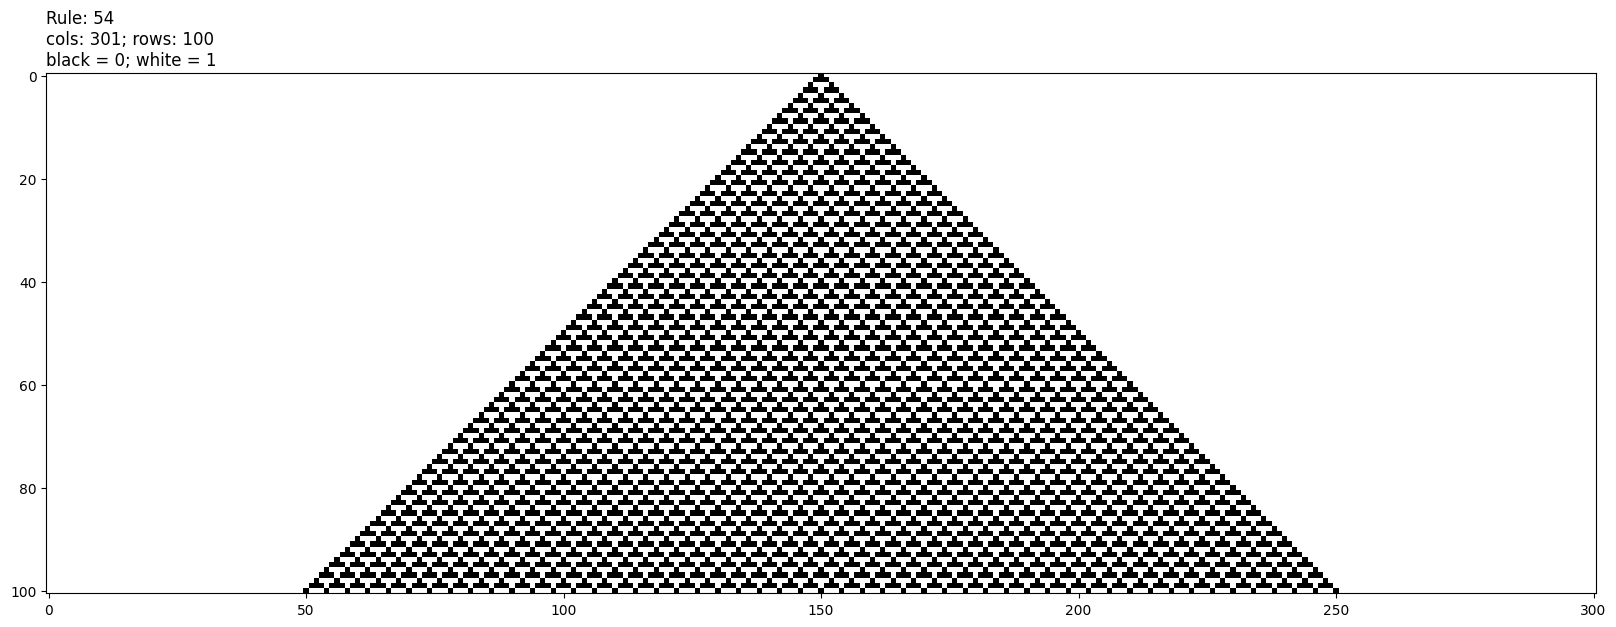

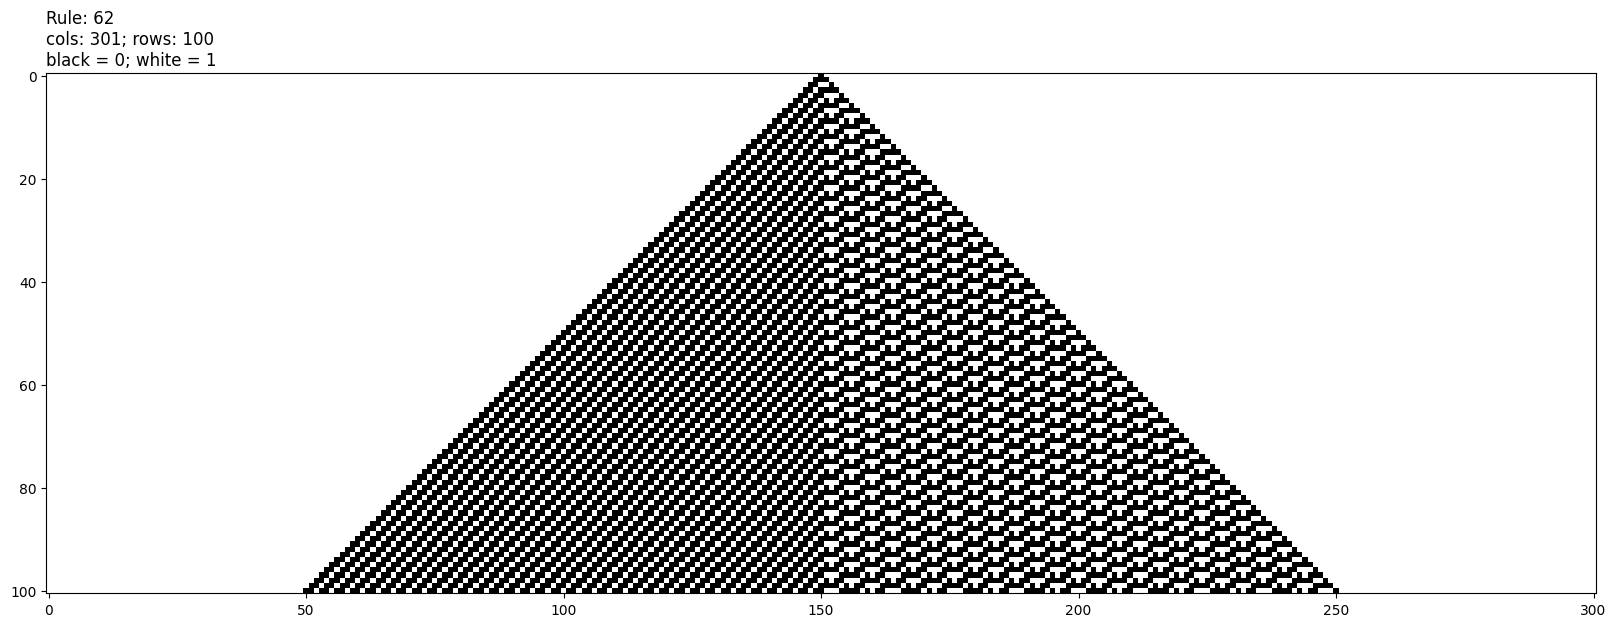

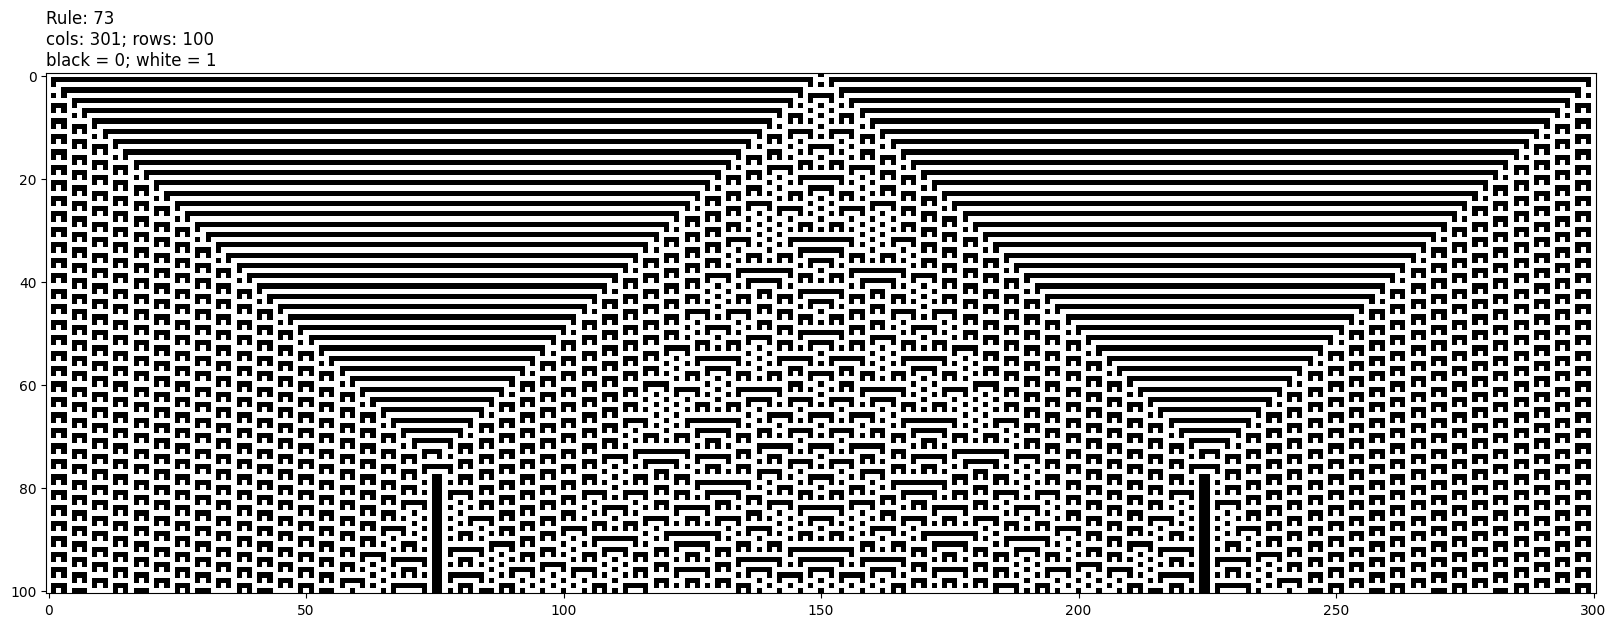

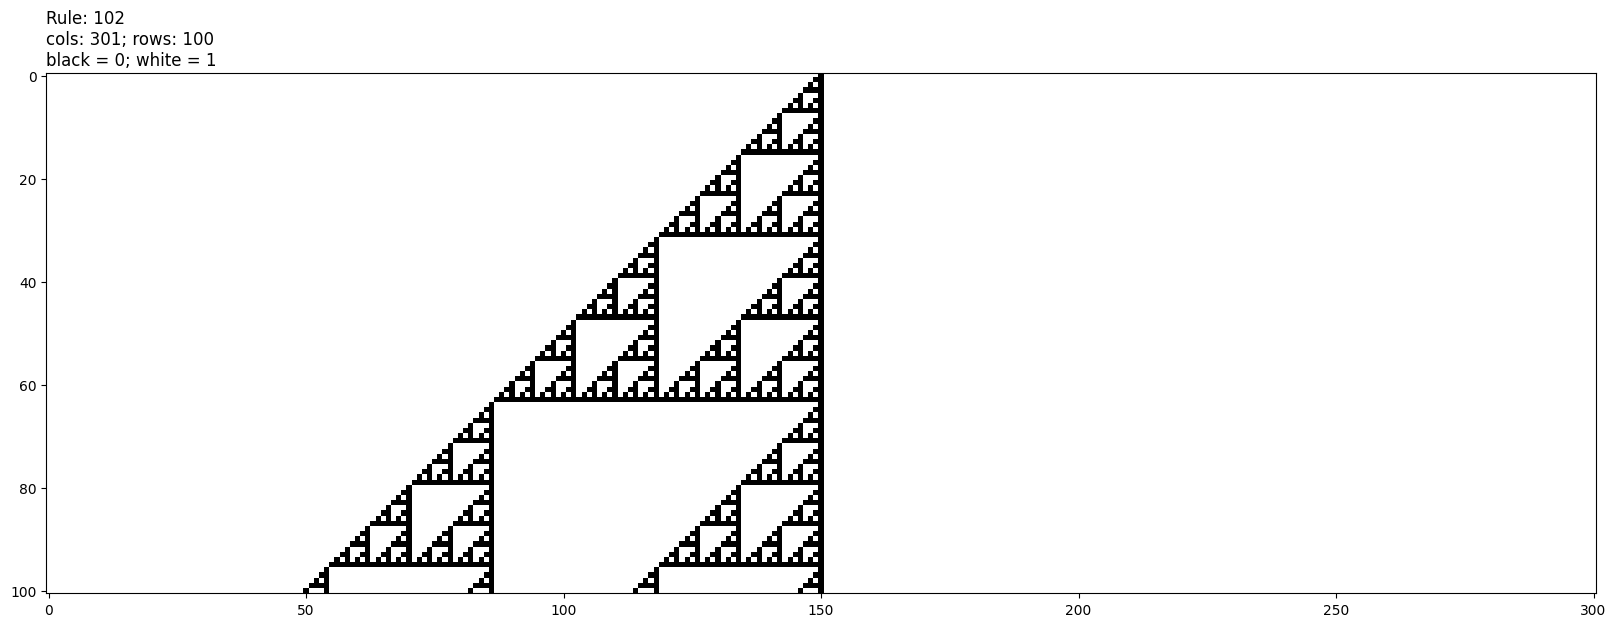

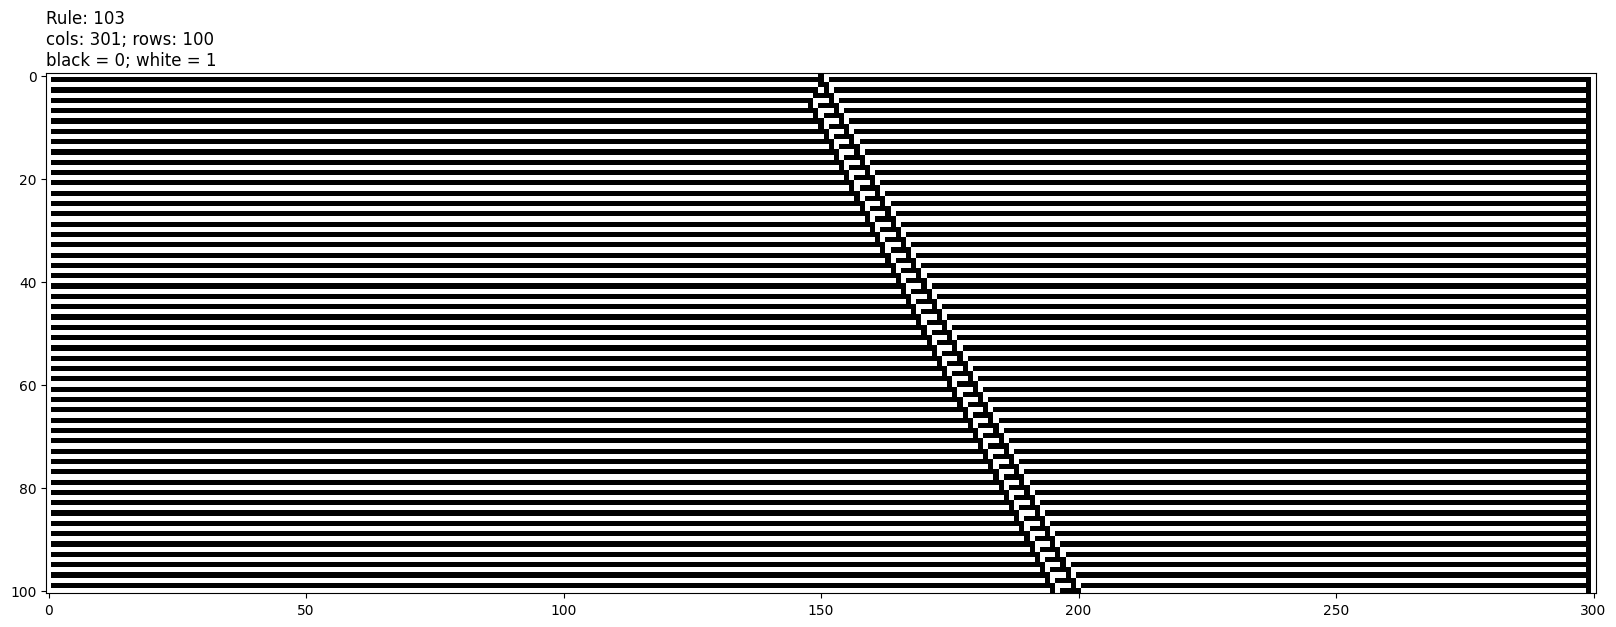

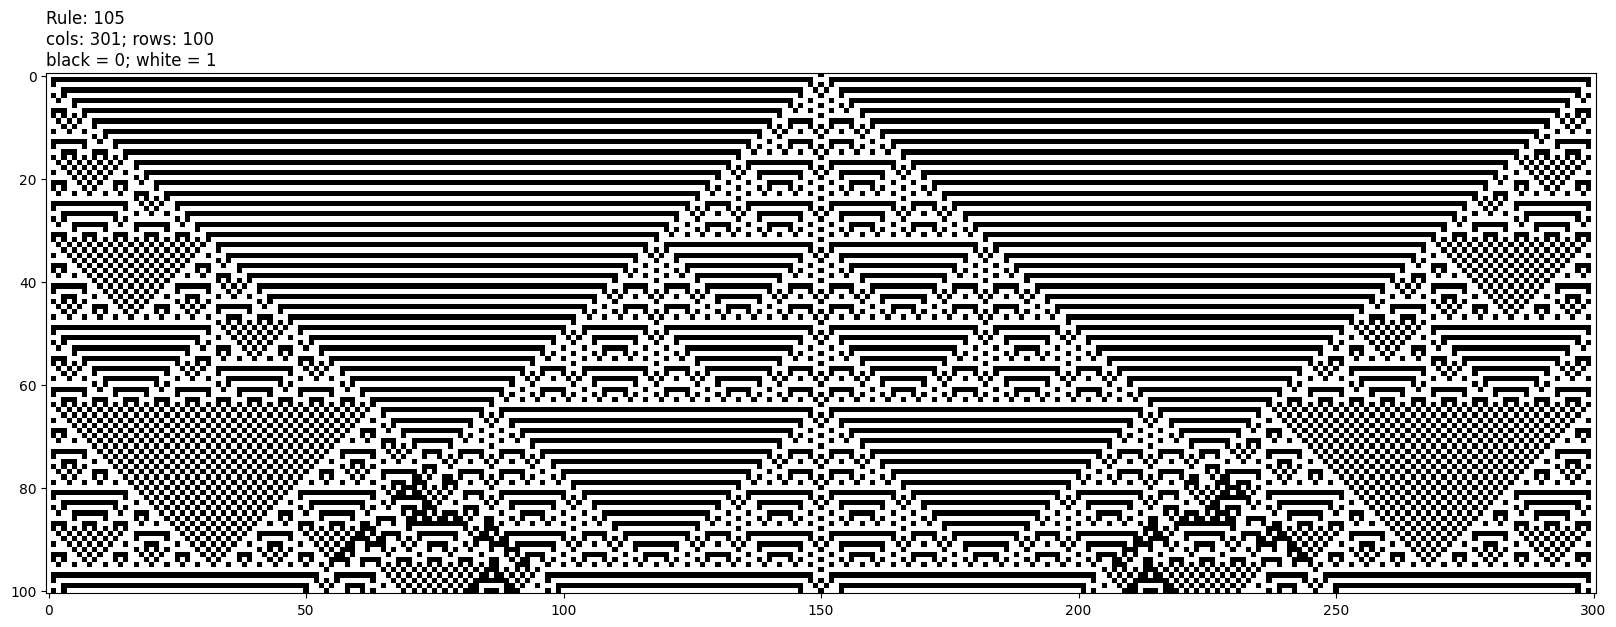

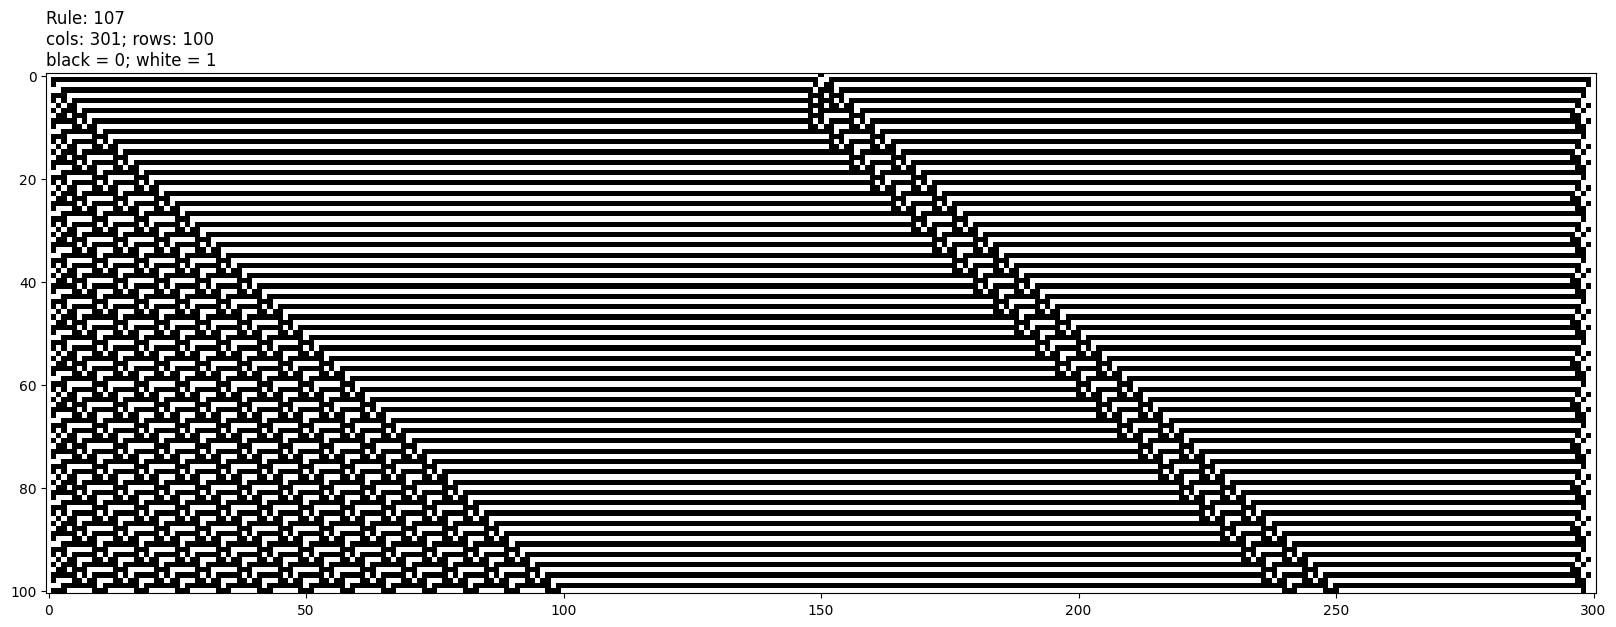

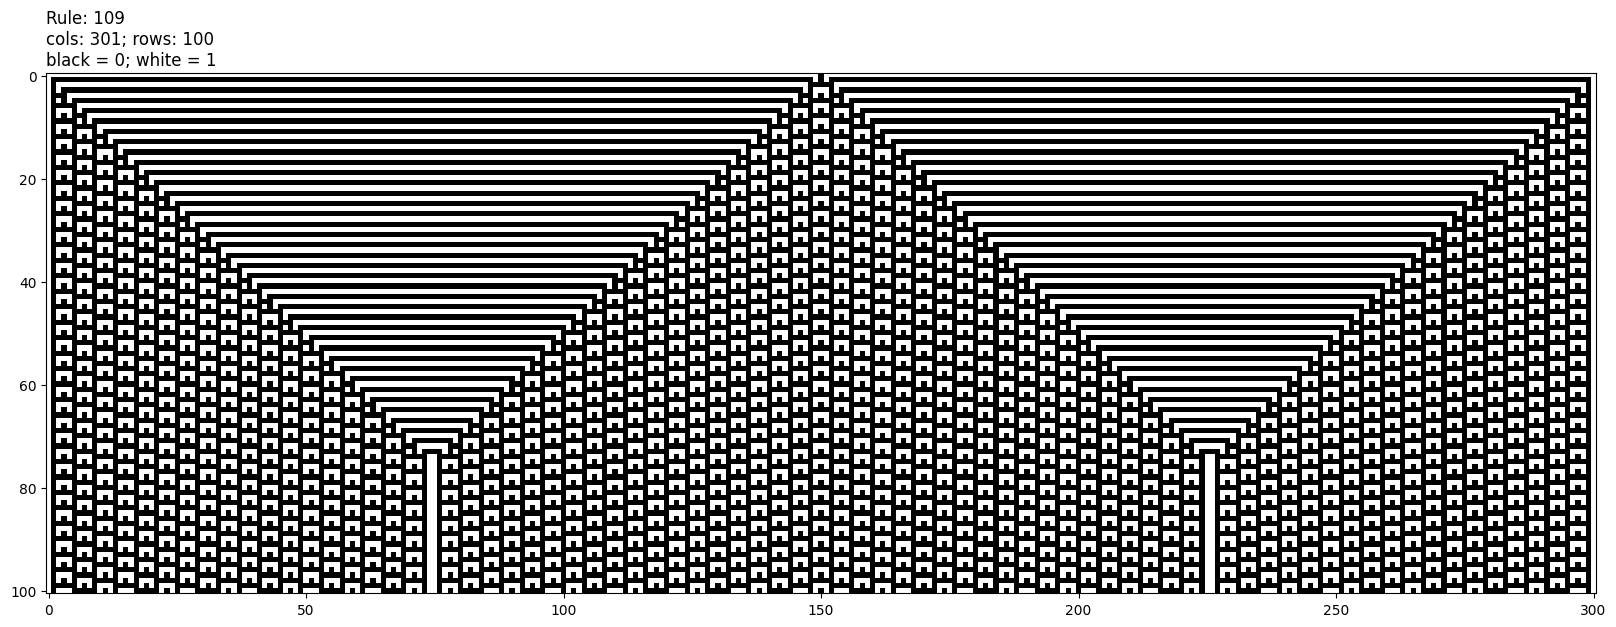

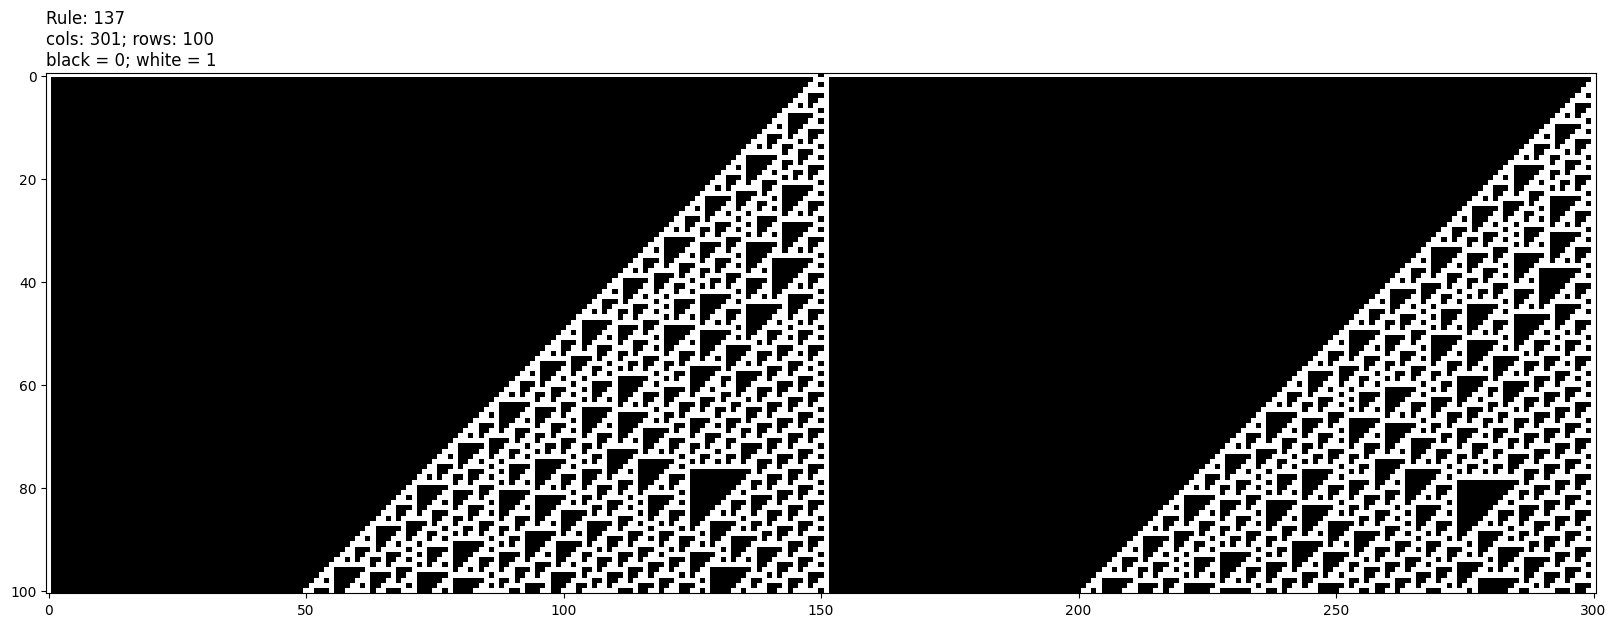

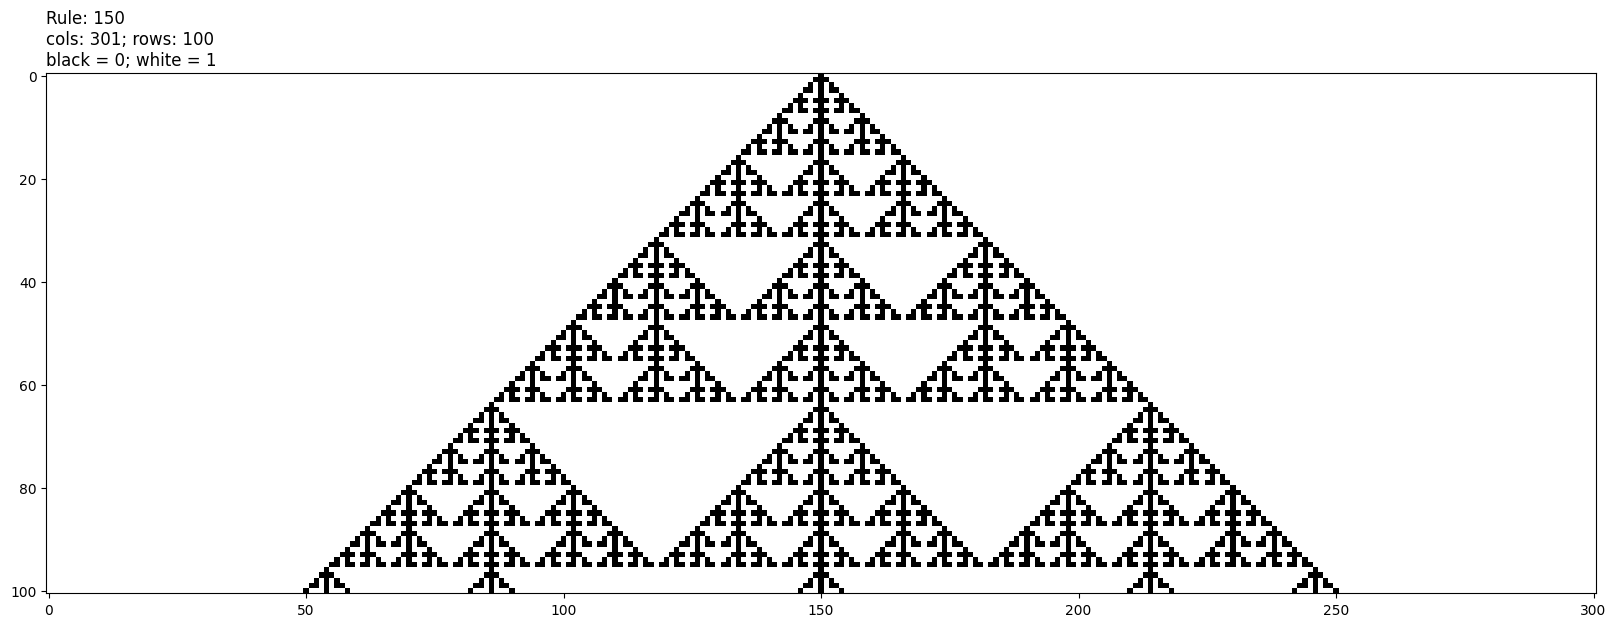

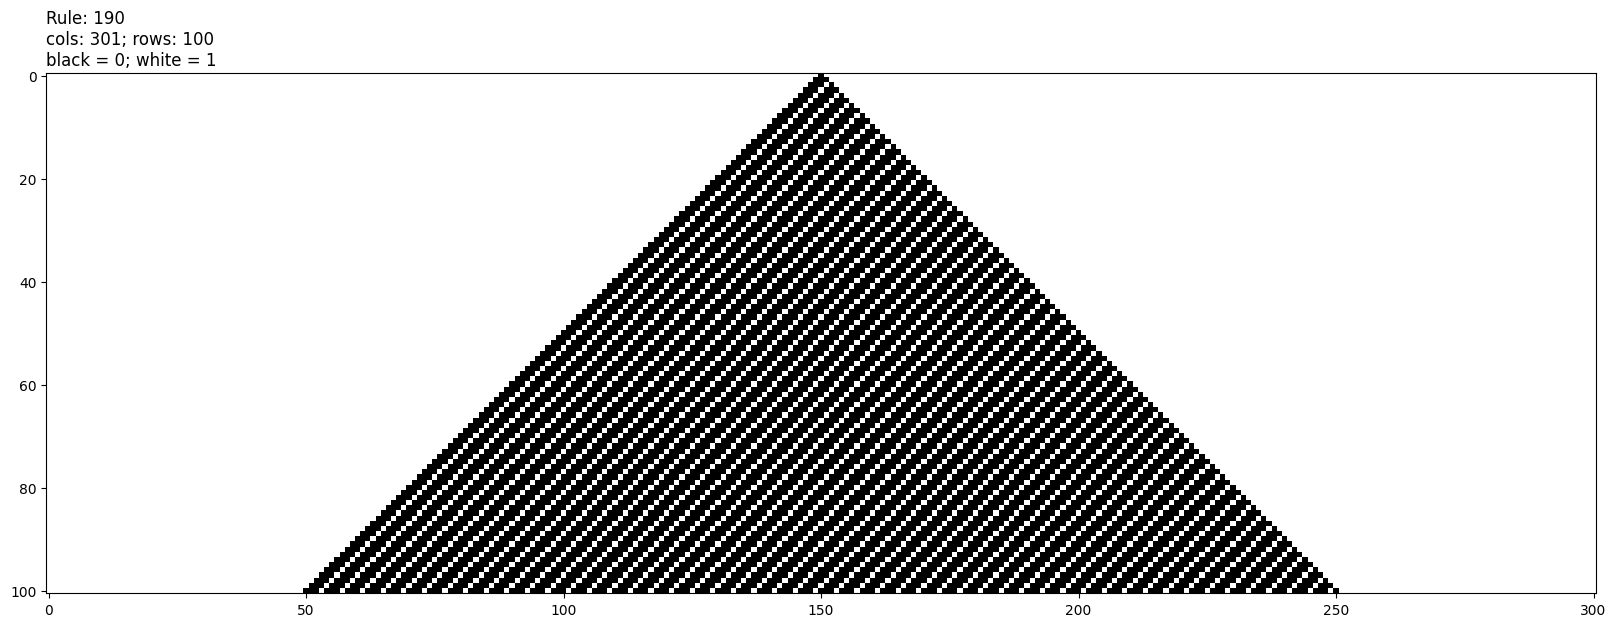

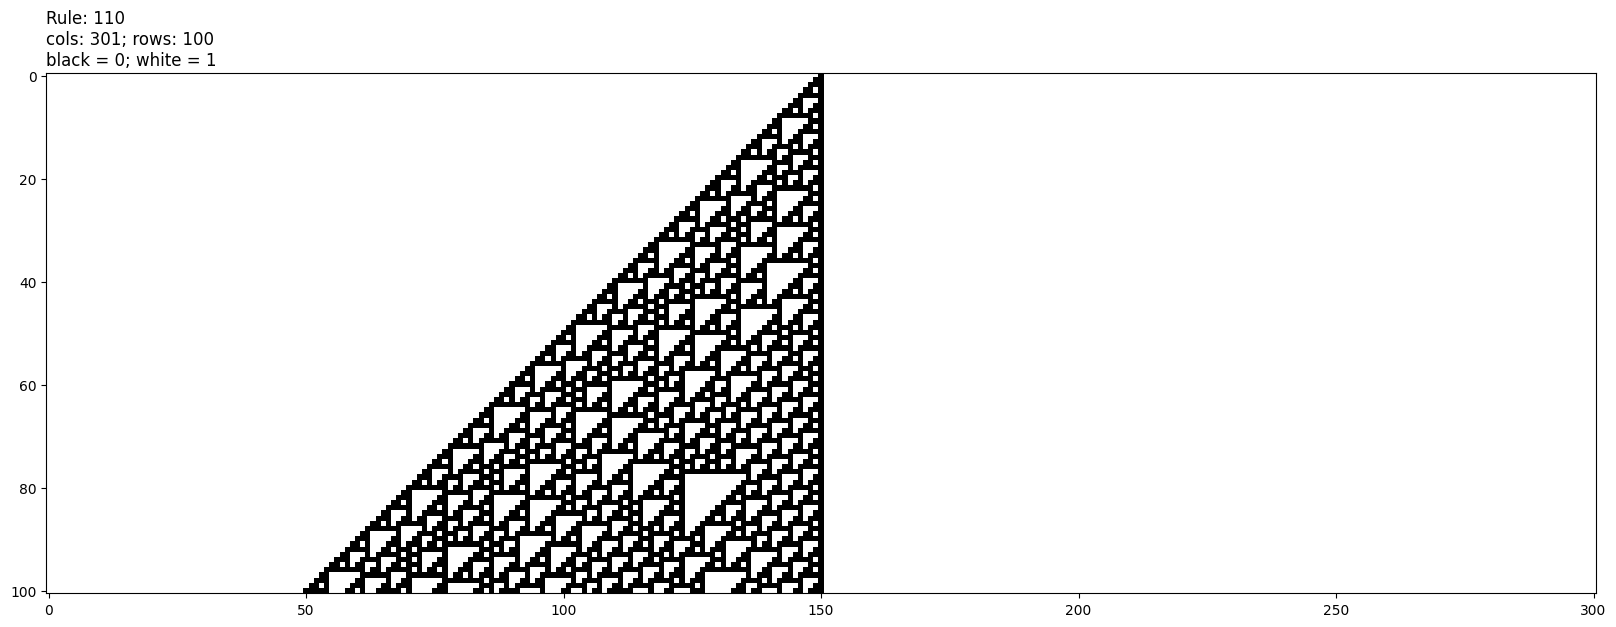

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
generation(18, 100, 301)
generation(30, 100, 301)
generation(45, 100, 301)
generation(54, 100, 301)
generation(62, 100, 301)
generation(73, 100, 301)
generation(102, 100, 301)
generation(103, 100, 301)
generation(105, 100, 301)
generation(107, 100, 301)
generation(109, 100, 301)
generation(137, 100, 301)
generation(150, 100, 301)
generation(190, 100, 301)
generation(110, 100, 301)

## Implementations

### Random number generator

In [65]:
def pseudo_random(rule, length, height, start_row = 0, output = False):
    # just incase the starting row is less than height.
    if height <= start_row:
        height += start_row

    numbers = np.linspace(0,1,length)

    CA = generation(rule, height, length, plotting = False)
    pseudo_random_numbers = []
    for i in range(start_row, len(CA)):
        chosen = CA[i]*numbers
        chosen = np.delete(chosen, np.where(chosen == 0))
        
        # The random number is the mean of the non zero values
        pseudo_random_numbers.append(np.mean(chosen))

    
    # Plotting the random numbers
    x = np.arange(start_row, height+1, 1)
    y = pseudo_random_numbers

    fig, ax = plt.subplots(figsize = (12,6))
    ax.plot(x, y, marker = 'o', linestyle = '--')
    ax.set_xlabel('generations')
    ax.set_ylabel('Average per generation')
    ax.set_title('Pseudo random number generator\nRule: ' + str(rule) + '\ngenerations used: '+str(start_row)+' to '+str(height), loc = 'left')
    if output == True:
        return pseudo_random_numbers



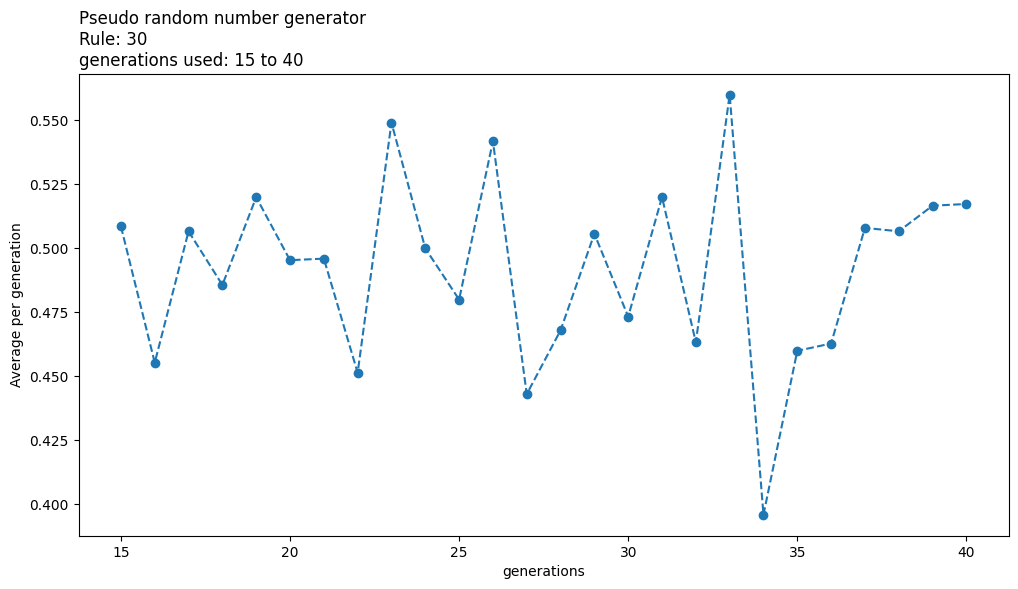

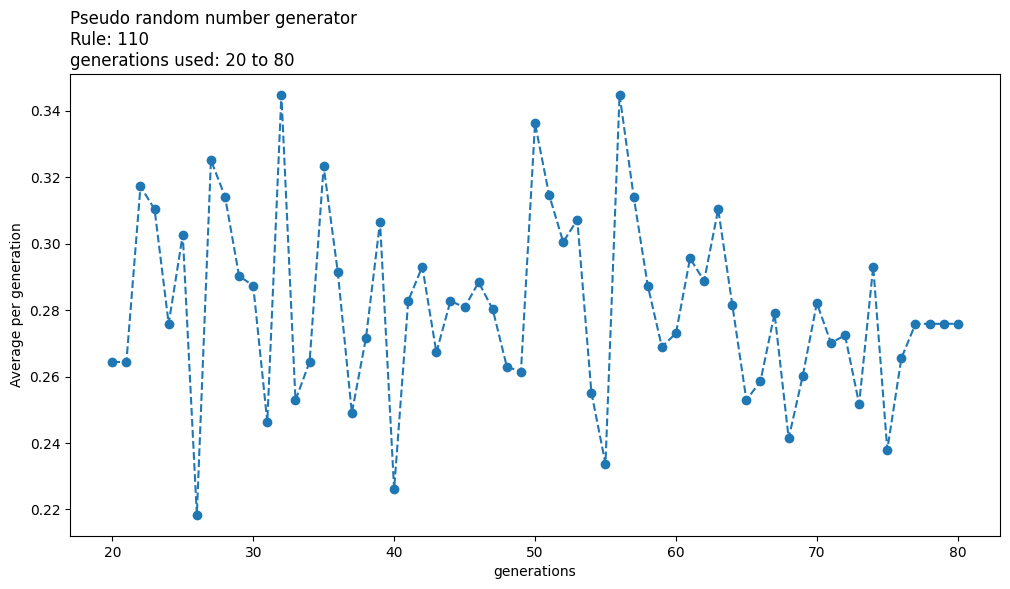

In [67]:
pseudo_random(30, 26, 40, start_row = 15)
pseudo_random(110, 30, 80, start_row = 20)
